Task: понять как работает множественная регрессия на реальных данных, и сделать теперь предсказание на основе 4 независимых переменных.

Import all modules


In [3]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


Read data

In [4]:
df = pd.read_csv("/home/vladick/Документы/test-python-main/основы статистики/states.csv")
y = df["poverty"]
x = df[['metro_res', "hs_grad", "female_house", "white"]]
test_x = pd.DataFrame([[52.5, 80.9, 12.1, 81.0]])
df.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


In [5]:
x.corr()

,metro_res,hs_grad,female_house,white
metro_res,1.000000,0.018110,0.300062,-0.342442
hs_grad,0.018110,1.000000,-0.611867,0.238156
female_house,0.300062,-0.611867,1.000000,-0.751394
white,-0.342442,0.238156,-0.751394,1.000000


Model


In [6]:
model = LinearRegression()

In [7]:
model.fit(x, y)

LinearRegression()

In [8]:
model.predict(test_x)

/home/vladick/.local/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.35513645])

In [11]:
model.intercept_

66.47652540538792

In [12]:
model.coef_

array([-0.05632285, -0.55471329,  0.05054296, -0.04814449])

Visualisation


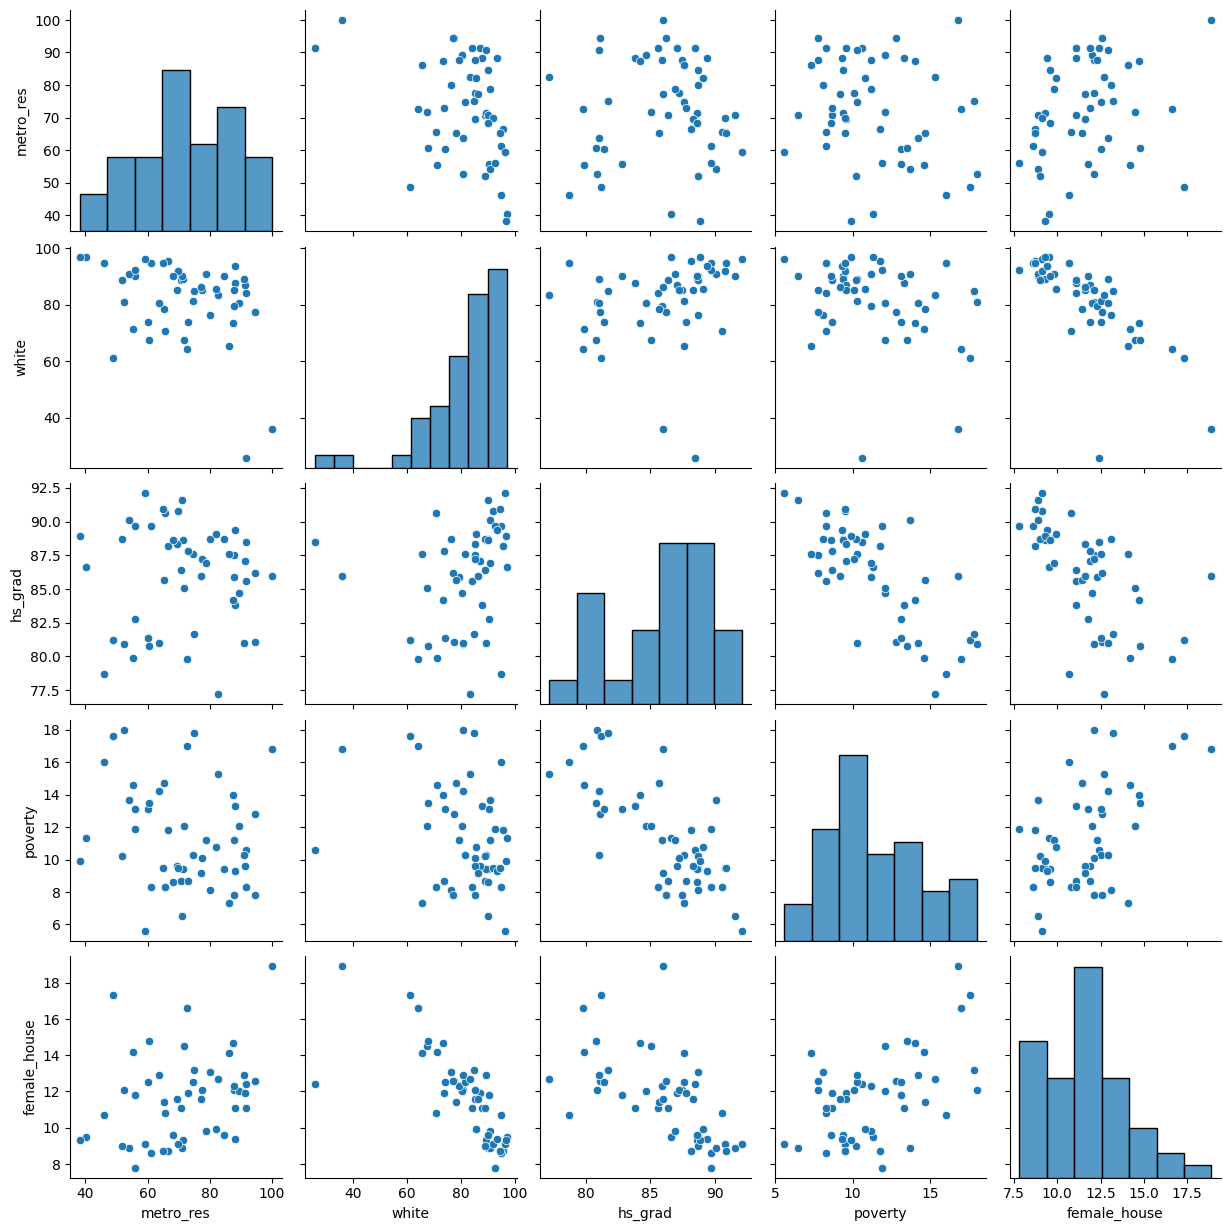

In [7]:
sb.pairplot(df)

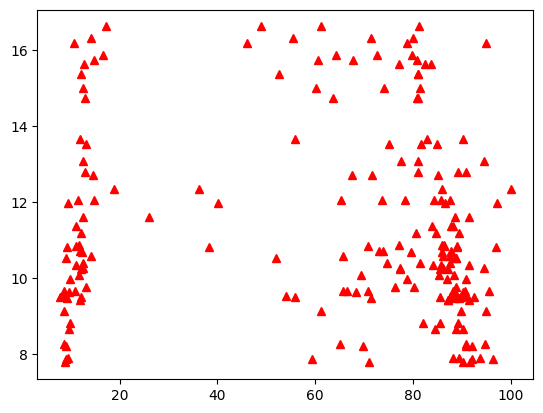

In [15]:
plt.plot(x, model.predict(x), "r^")
plt.show()